<a href="https://colab.research.google.com/github/Carol-Nunes/Reducao-de-dimensionalidade-em-imagens-com-Python/blob/main/Reducao_de_dimensionalidade_em_imagens_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Importação das bibliotecas

from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt


In [41]:
# Montar o Google Drive

drive.mount('/content/drive')

# Caminho para o arquivo .jpg no Drive

image_path = '/content/drive/MyDrive/praia.jpg'

# Lendo o arquivo usando PIL

colored_image = Image.open(image_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Função que transforma a imagem RGB em tons de cinza

def rgb_to_grayscale(image):

  width, height = image.size

  new_image = Image.new('L', (width, height)) # Cria uma nova imagem na escala de cinza que conterá o mesmo tamanho da imagem original (imagem colorida).

  for x in range(width):

    for y in range(height):

      pixel = image.getpixel((x, y)) # Pega a intensidade do pixel que se encontra na posição (x,y), que é obtida a partir dos dois laços for que percorrem a imagem original.

      grayscale = (pixel[0] + pixel[1] + pixel[2]) // 3 # Cálculo da média dos valores RGB do pixel da posição (x,y).

      new_image.putpixel((x, y), grayscale) # Coloca, na nova imagem criada, um pixel na posição (x,y) com a intensidade de cinza obtida a partir do cálculo anterior.

  return new_image




In [43]:

# Função que realiza a binarização na imagem RGB (por uma questão de maior facilidade a função pega a imagem em tons de cinza e a binariza)

def grayscale_to_binary(image):

    threshold = 127 # Para calcular o 'threshold', o famoso limiar, basta pegar a quantidade total de pixels (255) e dividir por dois.

    width, height = image.size

    new_image = Image.new('L', (width, height)) # Cria uma nova imagem em tons de cinza com as dimensões da imagem orinal (imagem na escala de cinza).

    for x in range(width):

      for y in range(height):

        pixel = image.getpixel((x,y)) # Pega a intensidade do pixel que se encontra na posição (x,y), que é obtida a partir dos dois laços for que percorrem a imagem original.

        '''

        Agora vamos, de fato, realizar a binarização da imagem.

        Se a intensidade do pixel na posição (x, y) for maior que o 'threshold' (limiar), é atribuída a cor branca (valor 1) para esse mesmo pixel na nova imagem que foi criada.

        Porém, se ocorrer o contrário, a cor preta (valor 0) é atribuída ao pixel na nova imagem.

        '''
        if pixel > threshold:

          new_image.putpixel((x, y), 1)

        else:

          new_image.putpixel((x, y), 0)

    return new_image




In [44]:
# Aplicando as funções

grayscale_image = rgb_to_grayscale(colored_image)

binary_image = grayscale_to_binary(grayscale_image)


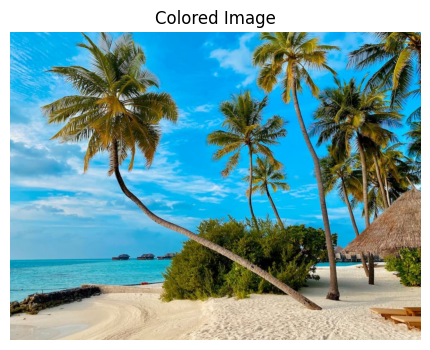

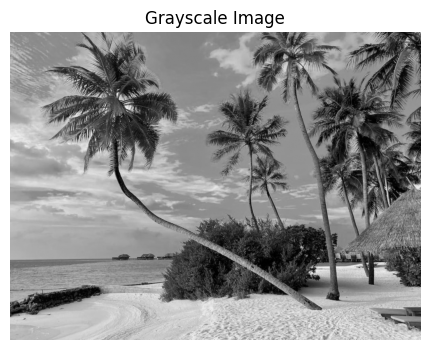

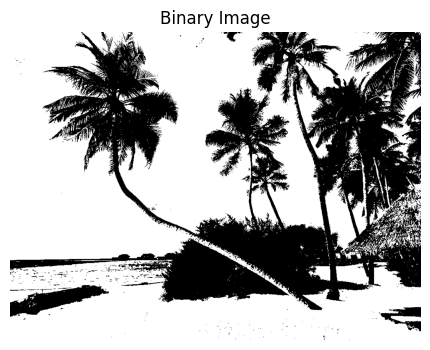

In [45]:
# Exibição das imagens

figsize = (8, 4)

plt.figure(figsize=figsize)
plt.imshow(colored_image)
plt.title('Colored Image')
plt.axis('off') # Esse comando é responsável por retirar os eixos x e y quando a imagem é exibida.
plt.show()

plt.figure(figsize=figsize)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

